In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
data=pd.read_csv('winequality-red.csv')
old_df=data.copy()
data[0:6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.size

19188

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.pylab import rcParams

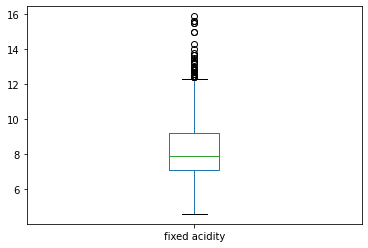

In [ ]:
data.boxplot(column=['fixed acidity'],grid= False)

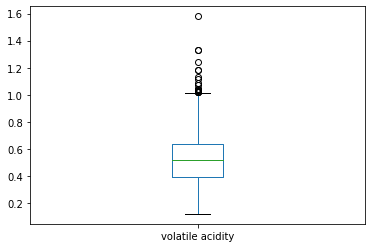

In [ ]:
data.boxplot(column=['volatile acidity'],grid= False)

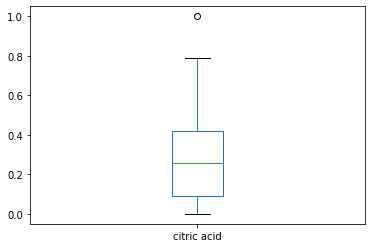

In [ ]:
data.boxplot(column=['citric acid'],grid= False)

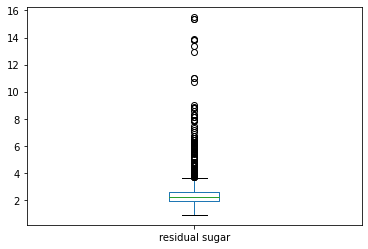

In [ ]:
data.boxplot(column=['residual sugar'],grid= False)

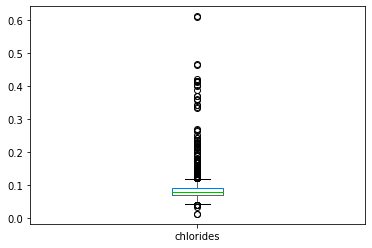

In [ ]:
data.boxplot(column=['chlorides'],grid= False)

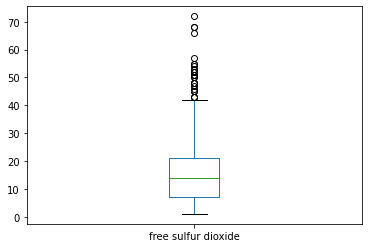

In [ ]:
data.boxplot(column=['free sulfur dioxide'],grid= False)

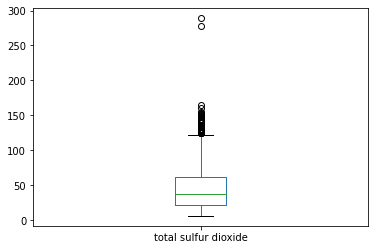

In [ ]:
data.boxplot(column=['total sulfur dioxide'],grid= False)

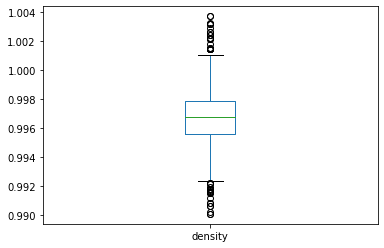

In [ ]:
data.boxplot(column=['density'],grid= False)

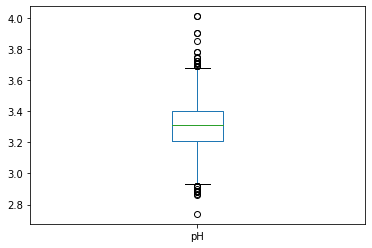

In [ ]:
data.boxplot(column=['pH'],grid= False)

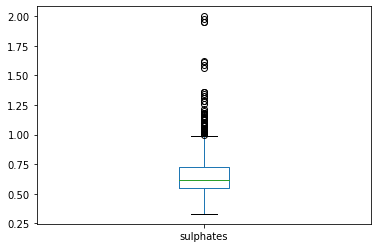

In [ ]:
data.boxplot(column=['sulphates'],grid= False)

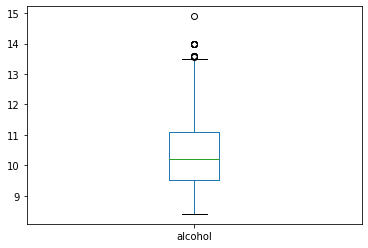

In [ ]:
data.boxplot(column=['alcohol'],grid= False)

In [ ]:
Q3 = np.percentile(data['fixed acidity'], 75,interpolation = 'midpoint')
Q1 = np.percentile(data['fixed acidity'], 25,interpolation = 'midpoint')
IQR=Q3-Q1
Outlier=Q3+1.5*IQR
Outlier

12.349999999999998

In [ ]:
outliers=np.where(data['fixed acidity']>Outlier)
outliers

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224]),)

In [ ]:
for i in outliers:
  data.drop(i, inplace=True)

In [ ]:
Q3 = np.percentile(data['volatile acidity'], 75,interpolation = 'midpoint')
Q1 = np.percentile(data['volatile acidity'], 25,interpolation = 'midpoint')
IQR=Q3-Q1
Outlier=Q3+1.5*IQR
outliers=np.where(data['volatile acidity']>=Outlier)
for i in outliers:
  data.drop(i, inplace=True)

In [ ]:
Q3 = np.percentile(data['citric acid'], 75,interpolation = 'midpoint')
Q1 = np.percentile(data['citric acid'], 25,interpolation = 'midpoint')
IQR=Q3-Q1
Outlier=Q3+1.5*IQR
outliers=np.where(data['citric acid']>=Outlier)
for i in outliers:
  data.drop(i, inplace=True)

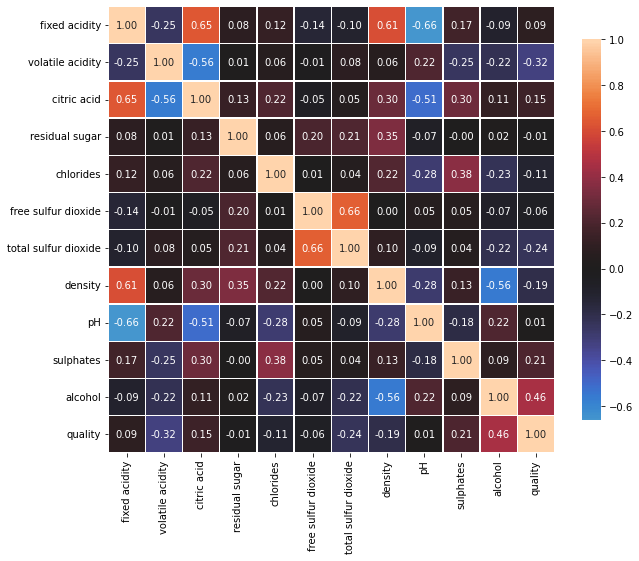

In [ ]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data)

**The strongly correlated items are :**
1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.
4.alcohol and quality.
so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

**The weekly correlated items are :**
1.citric acid and volatile acidity.
 2.fixed acidity and ph. 
 3.density and alcohol.

These are some relations which do not depend on each other at all.

This doesn't require dimensionality reduction as of now, as the attributes as different classifiers can take different no. of inputs. As there are only 11 attributes, which are all important in deciding the quality.
however, as seen in the case studies, attributes can be removed while choosing  and applying the model.

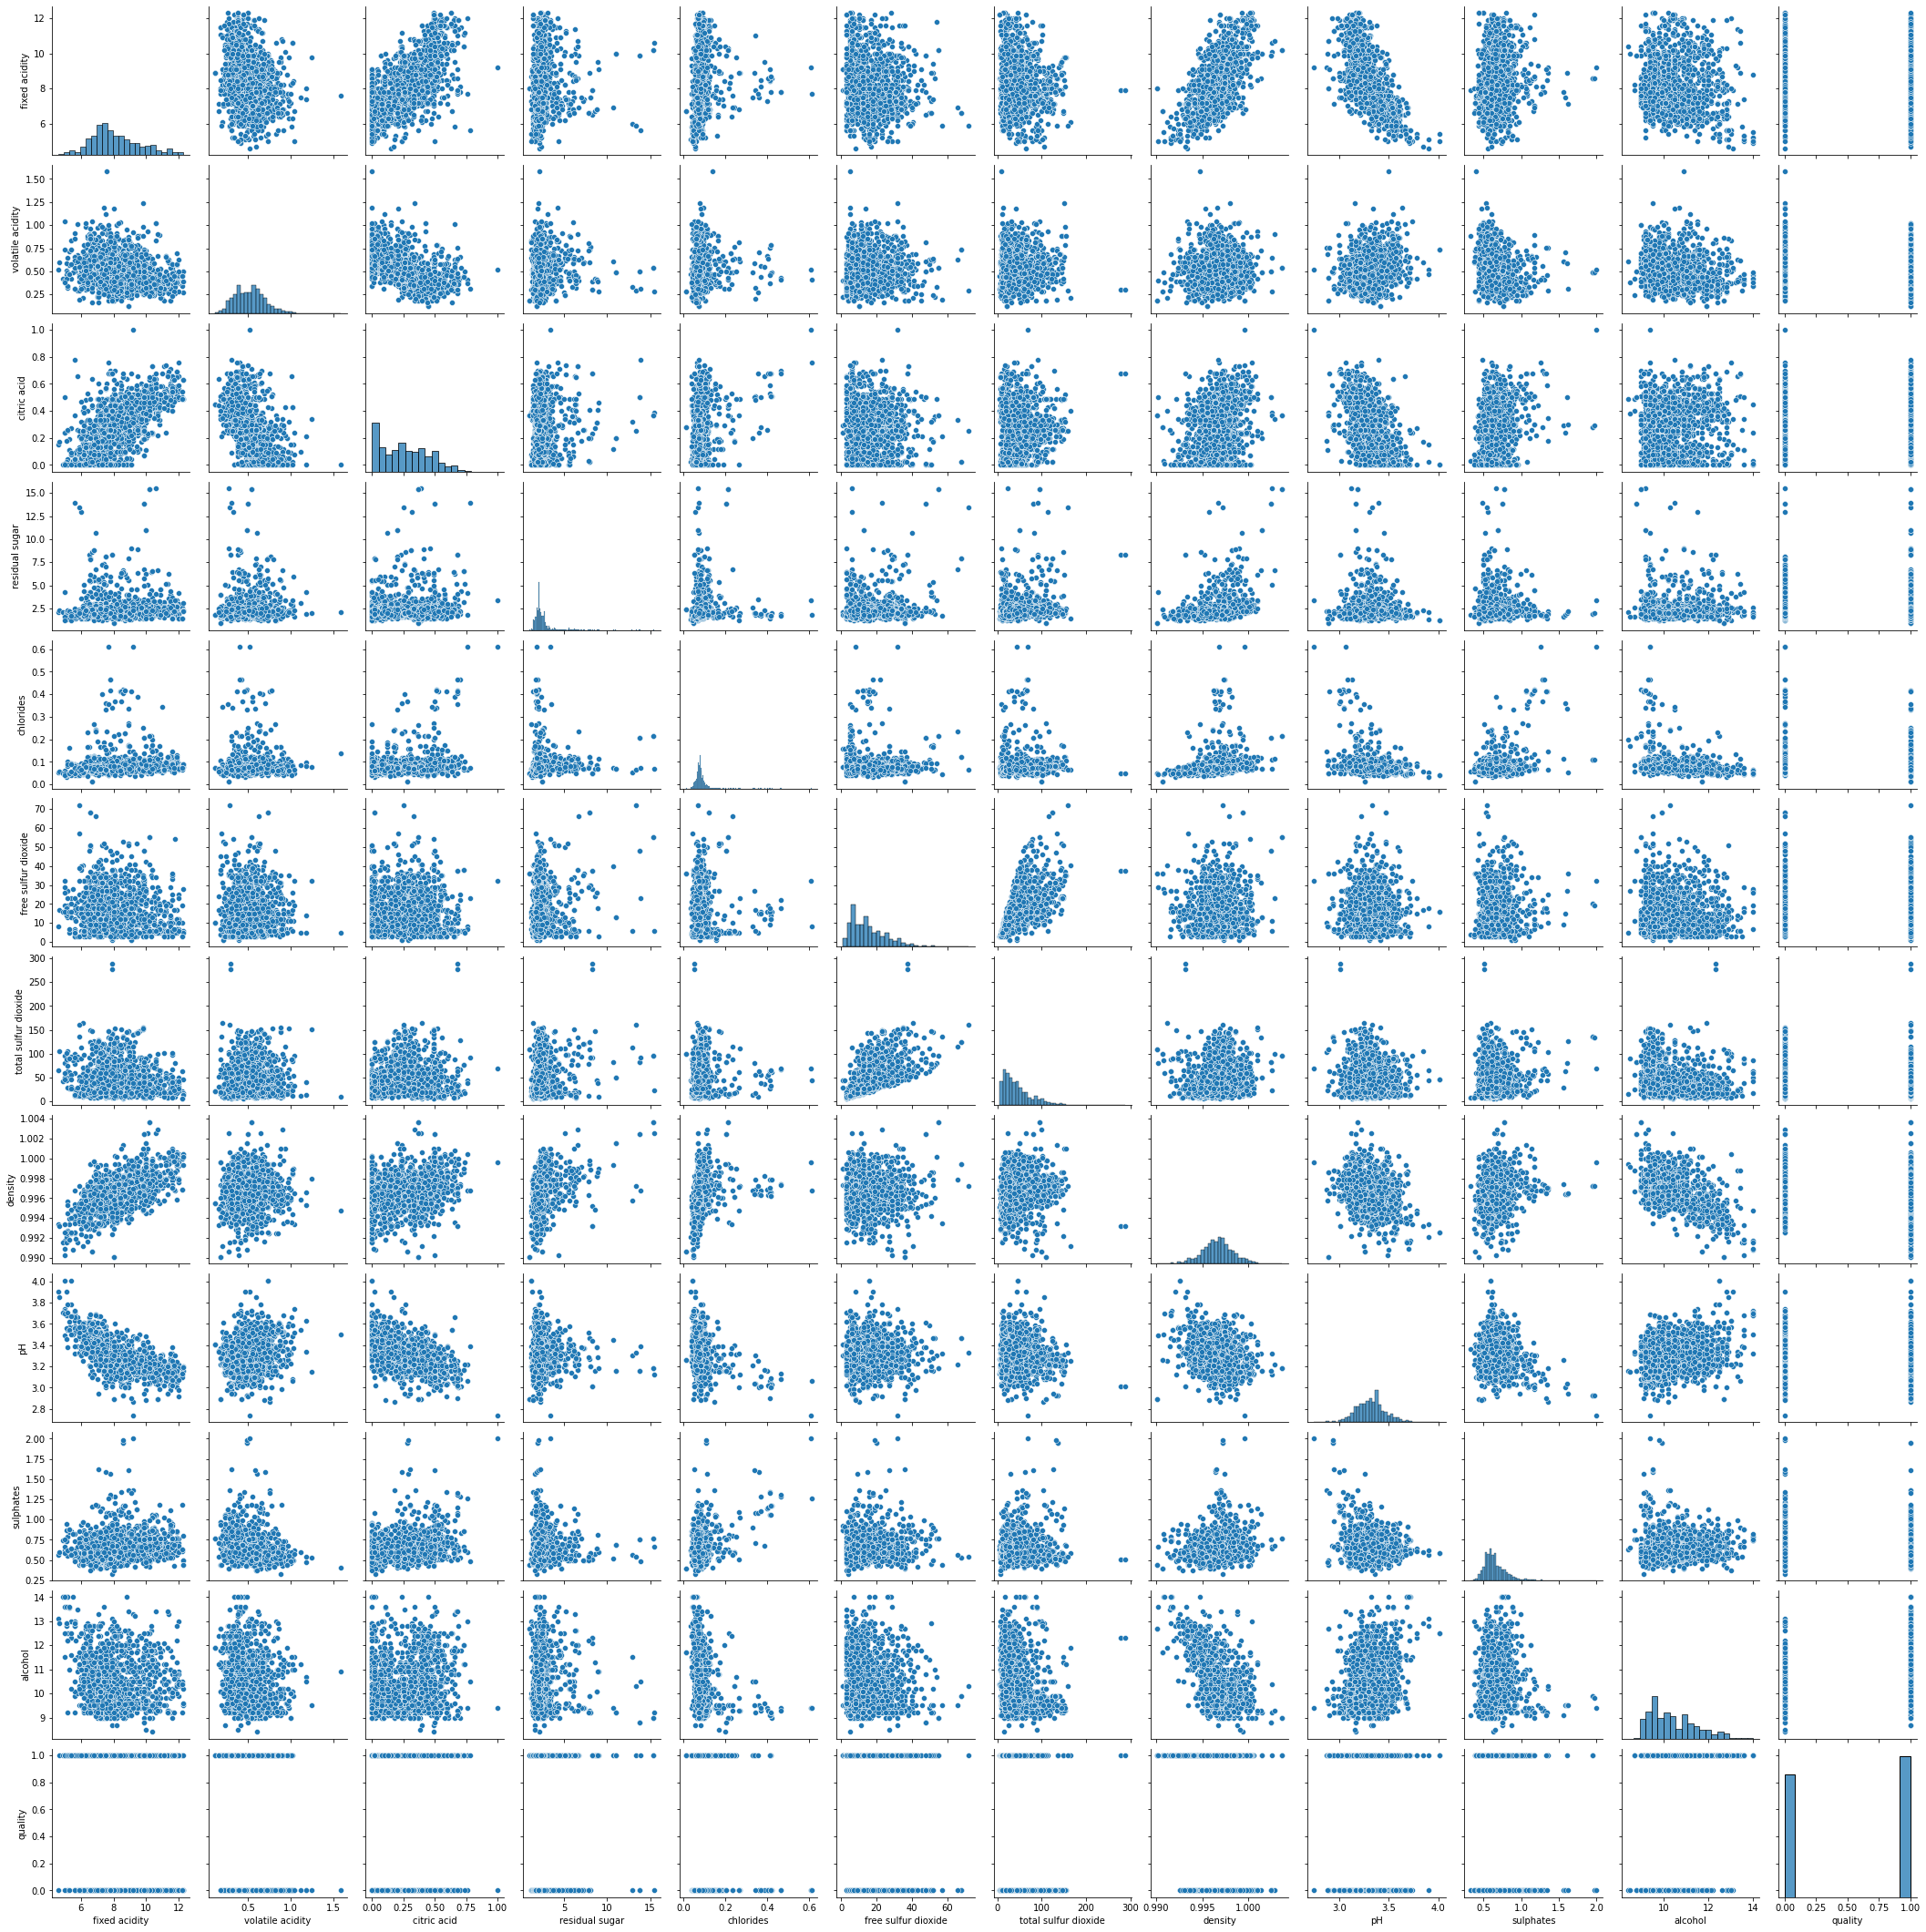

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [ ]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts



<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


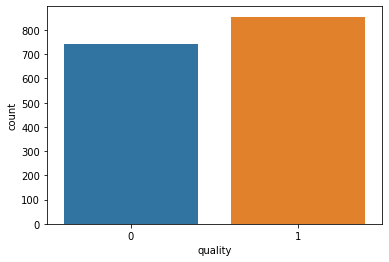

In [ ]:
sns.countplot(data['quality'])

In [ ]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [ ]:
# dividing the dataset in training and testing set

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [ ]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)